**Task 1: Building a classifier**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
! python --version

Python 3.10.11


In [ ]:
!pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, cmdstanpy, cufflinks, datascience, db-dtypes, dopamine-rl, fastai, google-colab, gspread-dataframe, holoviews, mizani, mlxtend, pandas-datareader, pandas-gbq, plotnine, prophet, pymc, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [ ]:
 !pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, lightgbm, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
!pip install keras numpy scipy
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')


In [ ]:
data["review"] = data["review"].str.lower()
data["review"] = data["review"].str.replace("<br />", "")
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})


In [ ]:
vectorizer = TfidfVectorizer(max_features=10000)
X = vectorizer.fit_transform(data['review']).toarray()
y = np.array(data['sentiment'].replace({'positive': 1, 'negative': 0}))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
lr_pred = lr_model.predict(X_test_vec)
lr_acc = accuracy_score(y_test, lr_pred)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_pred)


In [ ]:
print("Logistic Regression Accuracy:", lr_acc)
print("Naive Bayes Accuracy:", nb_acc)

Logistic Regression Accuracy: 0.8945
Naive Bayes Accuracy: 0.8652


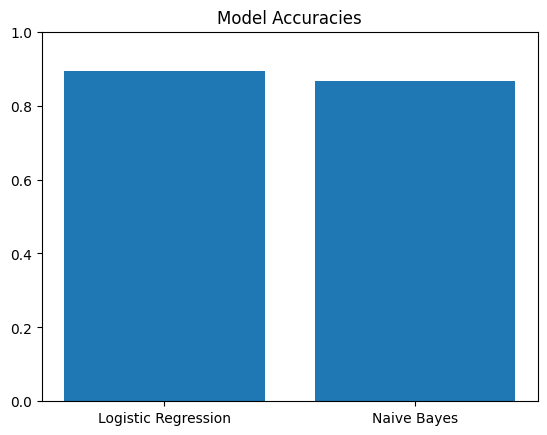

In [ ]:
labels = ["Logistic Regression", "Naive Bayes"]
accuracy = [lr_acc, nb_acc]
plt.bar(labels, accuracy)
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.show()

In [ ]:
# Define RNN model
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
model = Sequential()
model.add(Embedding(input_dim=len(vectorizer.word_index) + 1, output_dim=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile and train model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_vec.toarray(), y_train, epochs=2, batch_size=32, validation_data=(X_test_vec.toarray(), y_test), validation_split=0.1)


NameError: ignored

In [ ]:
# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

In [ ]:
# Plot accuracy and loss over epochs

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

The Regression model shows a better accuracy score among the three models.
